# Employee attrition through Ensemble tree-based methods

### Employee attrition is a natural process by which the employees leave the workplace, through resignation for personal reasons or retirement and are not immediately replaced.
### So, with our predictive modelling capabilities let us predict employee attrition on this data via DECISION TREE and RANDOM FOREST.

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## csv file I/O

employee = pd.read_csv('Employees data.csv')

## Exploratory Data Analysis

In [4]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
employee=employee.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1)

In [8]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Categorical Encoding

In [14]:
employee['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [16]:
employee['Attrition'] = labelencoder.fit_transform(employee['Attrition'])

In [17]:
employee['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [18]:
##Seperate out the numerical data

In [19]:
employee_num = employee.select_dtypes(include=[np.number]).copy()

In [20]:
employee_num.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [21]:
employee_char = employee.select_dtypes(include='object').copy()

In [22]:
employee_char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [23]:
employee_dummies = pd.get_dummies(employee_char)
employee_dummies

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [24]:
employee_combined = pd.concat([employee_num,employee_dummies],axis=1)

In [25]:
employee_combined.shape

(1470, 52)

## Implementing Model

### Split Data into X and Y

In [26]:
X= employee_combined.drop(['Attrition'],axis=1)
Y = employee_combined['Attrition']

### Split Data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

### Lets Build Model

In [29]:
## Decision Tree

from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [30]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [32]:
## Importing Confusion matrix to see performance of the model. 
## More of True positives and True negatives indicates good model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[361,  10],
       [ 56,  14]], dtype=int64)

In [33]:
## Testing the accuracy of the model.

from sklearn import metrics
metrics.accuracy_score(Y_test,Y_pred)

0.8503401360544217

In [28]:

col_importance = pd.concat([pd.Series(X_train.columns),pd.Series(model.feature_importances_)],axis=1,keys=['Column','Coefficient'])
col_importance.sort_values(by='Coefficient',ascending=False).head(5)

,Column,Coefficient
50,OverTime_Yes,0.507725
9,MonthlyIncome,0.286018
16,TotalWorkingYears,0.206256
38,JobRole_Human Resources,0.000000
29,EducationField_Human Resources,0.000000


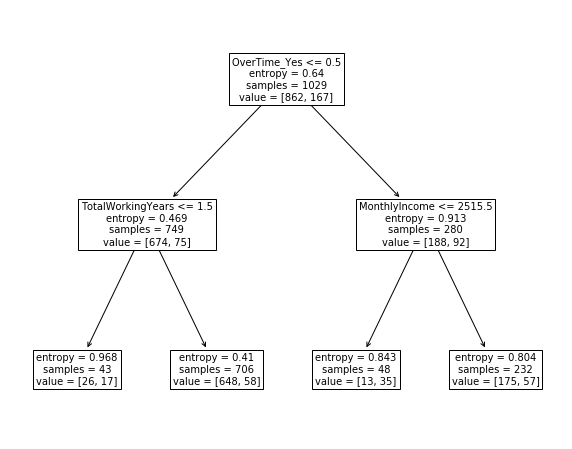

In [34]:
## Plotting and Saving the image of Classification of data

from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=X_train.columns.values)
plt.savefig('Sample Tree.jpeg')

In [35]:
## hard predictions
Y_pred = model.predict(X_test)

In [31]:
## Soft predictions
## Doesnot get affected by threshold

model.predict_proba(X_test)

array([[0.75431034, 0.24568966],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.75431034, 0.24568966],
       [0.27083333, 0.72916667],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.27083333, 0.72916667],
       [0.91784703, 0.08215297],
       [0.75431034, 0.24568966],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.75431034, 0.24568966],
       [0.60465116, 0.39534884],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.60465116, 0.39534884],
       [0.75431034, 0.24568966],
       [0.91784703, 0.08215297],
       [0.

In [32]:
## Finding Area under Curve
## Higher the AUC, better the model is predicting 0s as 0s and 1s as 1s

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
print('Area Under ROC curve',roc_auc)

Area Under ROC curve 0.6658259530227185


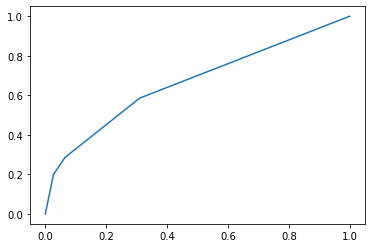

In [33]:
## Plotting ROC curve
## It is a graphical representation between sensitivity and specificity.

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(Y_test,model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)

## Decision Tree Implementation

In [35]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=1,random_state=15)

dt_model.fit(X_train,Y_train)
Y_pred_test=dt_model.predict(X_test)
Y_pred_train=dt_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.7444120505344995
Accuracy Test: 0.691609977324263


In [46]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=15,random_state=15)

dt_model.fit(X_train,Y_train)
Y_pred_test=dt_model.predict(X_test)
Y_pred_train=dt_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.9980563654033042
Accuracy Test: 0.7959183673469388


In [49]:
from sklearn import *

rf_model=ensemble.RandomForestClassifier(n_estimators=150,criterion='entropy',class_weight='balanced',max_leaf_nodes=15,random_state=15)

rf_model.fit(X_train,Y_train)
Y_pred_test=rf_model.predict(X_test)
Y_pred_train=rf_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.8668610301263362
Accuracy Test: 0.7913832199546486


## Optimisation Techniques

### RandomSearchCV

In [52]:
model_params={'n_estimators':[140,145,150,155,160],
            'max_leaf_nodes':range(10,20),
            'criterion':['gini','entropy']}

In [53]:
rf_model=ensemble.RandomForestClassifier(random_state=15)

In [54]:
random_search_object=model_selection.RandomizedSearchCV(rf_model,model_params,n_iter=10,cv=3,random_state=15)

In [55]:
random_search_best_model=random_search_object.fit(X_train,Y_train)

In [56]:
Y_pred_test=random_search_best_model.predict(X_test)
Y_pred_train=random_search_best_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.8765792031098154
Accuracy Test: 0.8571428571428571


In [57]:
random_search_best_model.best_params_

{'n_estimators': 145, 'max_leaf_nodes': 17, 'criterion': 'gini'}

### GridSearchCV

In [58]:
grid_search_object = model_selection.GridSearchCV(rf_model,model_params,cv=3)

In [59]:
grid_search_best_model = grid_search_object.fit(X_train,Y_train)

In [60]:
Y_pred_test=grid_search_best_model.predict(X_test)
Y_pred_train=grid_search_best_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.8785228377065112
Accuracy Test: 0.8571428571428571


In [61]:
grid_search_best_model.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 18, 'n_estimators': 140}